In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import cobra
import cobra.test
from cobra.flux_analysis import (single_gene_deletion, 
                                single_reaction_deletion,
                                double_gene_deletion,
                                double_reaction_deletion)

### Read Model

Ecoli for comparisson

In [2]:
ecoli_model = cobra.test.create_test_model("ecoli")
ecoli_model

Name,iJO1366
Memory address,0x07fd3c8e250d0
Number of metabolites,1805
Number of reactions,2583
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


Compare with BIGG Dataset's ecoli...a lot of missing metabolites.

In [39]:
ecoli_model2 = cobra.io.read_sbml_model("e_coli_core.xml")
ecoli_model2

Name,e_coli_core
Memory address,0x07fd368da4340
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


Pneumoniae for project

In [3]:
pneu_model = cobra.io.read_sbml_model("iYL1228.xml")
pneu_model

Name,iYL1228
Memory address,0x07fd3d9d94670
Number of metabolites,1658
Number of reactions,2262
Number of groups,0
Objective expression,1.0*BIOMASS_ - 1.0*BIOMASS__reverse_091e5
Compartments,"periplasm, cytosol, extracellular space"


### Single reaction deletions
This performs all single gene deletions on a model, which can be done for reactions, specific ones too.

Ecoli first

In [5]:
single_ecoli = single_reaction_deletion(ecoli_model, ecoli_model.reactions)
single_ecoli

,ids,growth,status
0,{GLYCTO3},0.982372,optimal
1,{PGP120abcpp},0.982372,optimal
2,{UDCPDPpp},0.982372,optimal
3,{DHBD},0.982372,optimal
4,{BETALDHx},0.982372,optimal
...,...,...,...
2578,{GLYAT},0.982372,optimal
2579,{23CCMPtex},0.982372,optimal
2580,{EX_inost_e},0.982372,optimal
2581,{HYXNtpp},0.982372,optimal


In [40]:
single_ecoli2 = single_reaction_deletion(ecoli_model2, ecoli_model2.reactions)
single_ecoli2

,ids,growth,status
0,{SUCOAS},0.858307,optimal
1,{EX_fum_e},0.873922,optimal
2,{FORt2},0.873922,optimal
3,{ME1},0.873922,optimal
4,{SUCCt2_2},0.873922,optimal
...,...,...,...
90,{PPC},0.870745,optimal
91,{AKGt2r},0.873922,optimal
92,{GLNabc},0.873922,optimal
93,{GLCpts},NaN,infeasible


Pneumoniae second

In [6]:
single_pneu = single_reaction_deletion(pneu_model, pneu_model.reactions)
single_pneu

,ids,growth,status
0,{UDCPDPpp},1.042637,optimal
1,{EX_lys__L_e},1.042637,optimal
2,{DHBD},1.042637,optimal
3,{BETALDHx},1.042637,optimal
4,{FACOAL120t2pp},1.042637,optimal
...,...,...,...
2257,{PAPA161},1.042637,optimal
2258,{NTPP6},1.042637,optimal
2259,{GLYAT},1.042637,optimal
2260,{23CCMPtex},1.042637,optimal


### Evaluating thresholds

In [9]:
# get essential reactions given this threshold

def get_essentials(single_reacts, thresh_list):
    default = 0.982
    essentials=[[],[],[]]
    
    for i, threshold in enumerate(thresh_list):
        for j in range(len(single_reacts)):
            if single_reacts.loc[j,"growth"] <threshold * default:
                name = list(single_reacts.loc[j,"ids"])[0]
                essentials[i].append(name)
                
    return essentials

Ecoli and pneumoniae

In [10]:
t_list = [0.01, 0.05, .1]
essentialE = get_essentials(single_ecoli, t_list)
essentialP = get_essentials(single_pneu, t_list)

In [15]:
essentialP

[['CBPS',
  'PGSA181',
  'IPPMIa',
  '3OAS141',
  'TYRTA',
  '3OAR60',
  'UAGDP',
  'PHETA1',
  'OMPDC',
  'DHQTi',
  'ACLS',
  'G5SADs',
  'PRAIS',
  'UGMDDS',
  'PItex',
  'P5CR',
  'ACOTA',
  '3HAD141',
  'DASYN160',
  'G3PAT160',
  'IG3PS',
  'PAPPT3',
  'PE161abcpp',
  'PRFGS',
  'HSST',
  '3OAR161',
  'G1PTT',
  'GLUPRT',
  'GMHEPPA',
  'THRS',
  '3OAR100',
  'PE160abcpp',
  'TDSK',
  'ACODA',
  'IPMD',
  'GALUi',
  '3OAS161',
  'GMHEPAT',
  'UDPG4E',
  'OCBT',
  'UMPK',
  'NH4tex',
  'T2DECAI',
  'PRAGSr',
  'ALAR',
  '3OAS100',
  'G1PACT',
  'MCOATA',
  'A5PISO',
  'HSTPT',
  'CLPNS181pp',
  'ASAD',
  'LPADSS',
  'CHORM',
  '3HAD100',
  'G3PD2',
  'PSD160',
  'PSSA160',
  'LEUTAi',
  'DHDPRy',
  'GLA',
  'BPNT',
  'DHQS',
  'BIOMASS_',
  'AGMHE',
  'PGSA161',
  'UAMAGS',
  'SADT2',
  'PMANM',
  'G3PAT161',
  'PGAMT',
  'PRAMPC',
  '3OAR40',
  'AGPAT161',
  'SULR',
  'PE181abcpp',
  'ADSL1r',
  'CLPNS161pp',
  'ACCOAC',
  'DAPDC',
  'HSK',
  'ACGS',
  'HISTP',
  'UAPGR',
  'DHDP

### Optimizing Models

In [16]:
ecoli_model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,0.000219,0.000000
DM_5drib_c,0.000221,0.000000
DM_aacald_c,0.000000,0.000000
DM_amob_c,0.000002,0.000000
DM_mththf_c,0.000440,0.000000
...,...,...
ZN2abcpp,0.000000,-0.008295
ZN2t3pp,0.000000,-0.002074
ZN2tpp,0.000335,0.000000
ZNabcpp,0.000000,-0.008295


In [17]:
pneu_model.optimize()

,fluxes,reduced_costs
EX_cd2_e,0.000000e+00,0.000000e+00
3OAR80,2.717113e-01,0.000000e+00
EX_cbi_e,0.000000e+00,0.000000e+00
EX_cbl1_e,0.000000e+00,0.000000e+00
2AGPEAT120,-8.075484e-15,-1.665335e-16
...,...,...
EX_orot_e,0.000000e+00,-1.199646e-01
EX_pacald_e,0.000000e+00,-2.615621e-01
EX_peamn_e,0.000000e+00,0.000000e+00
EX_phe__L_e,0.000000e+00,-3.566159e-01


### How many reactions in each model?

Ecoli and Penuominae

In [25]:
print("There are a total of {} reactions in Ecoli model.".format(len(ecoli_model.reactions)))
print("*"*55)
print("There are a total of {} reactions in Pneumoniae model.".format(len(pneu_model.reactions)))

There are a total of 2583 reactions in Ecoli model.
*******************************************************
There are a total of 2262 reactions in Pneumoniae model.


### Plot the growth for each model


Ecoli

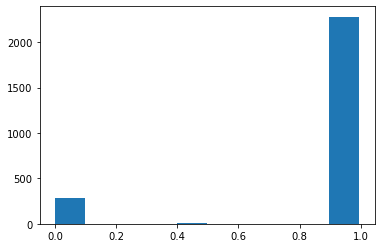

In [29]:
plt.hist(single_ecoli['growth']);

In [34]:
print("Reactions with single gene deletion for ECOLI whose growth are below threshold values 0.01, 0.05, and .1:")
print(sum(single_ecoli['growth']<t_list[0]))
print(sum(single_ecoli['growth']<t_list[1]))
print(sum(single_ecoli['growth']<t_list[2]))

Reactions with single gene deletion for ECOLI whose growth are below threshold values 0.01, 0.05, and .1:
288
288
288


K.Pneuominae

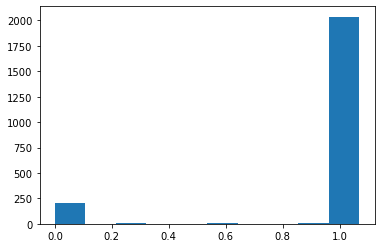

In [30]:
plt.hist(single_pneu['growth']);

In [35]:
print("Reactions with single gene deletion for K.Pneumoniae whose growth are below threshold values 0.01, 0.05, and .1:")
print(sum(single_pneu['growth']<t_list[0]))
print(sum(single_pneu['growth']<t_list[1]))
print(sum(single_pneu['growth']<t_list[2]))

Reactions with single gene deletion for K.Pneumoniae whose growth are below threshold values 0.01, 0.05, and .1:
202
202
202


hhhmm...interesing

### Save reactions

Only saving Pneumoniae because we already have ecoli saved.

In [36]:
with open("essential_rxns_pneu.txt", "w") as f:
    for rxn in essentialP[0]:
        f.write(rxn + "\n")

### Summarizing Models

Ecoli

In [37]:
ecoli_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.005113,0,0.00%
cl_e,EX_cl_e,0.005113,0,0.00%
cobalt2_e,EX_cobalt2_e,2.456E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006965,0,0.00%
fe2_e,EX_fe2_e,0.01578,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1918,0,0.00%
mg2_e,EX_mg2_e,0.008522,0,0.00%
mn2_e,EX_mn2_e,0.0006788,0,0.00%
mobd_e,EX_mobd_e,0.0001267,0,0.00%


Pneumoniae

In [38]:
pneu_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10.46,0,0.00%
nh4_e,EX_nh4_e,10.11,0,0.00%
o2_e,EX_o2_e,21.83,0,0.00%
pi_e,EX_pi_e,1.19,0,0.00%
so4_e,EX_so4_e,0.1804,0,0.00%
dna5mtc_c,SK_dna5mtc_c,0.09905,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-23,0,0.00%
h2o_e,EX_h2o_e,-48.26,0,0.00%
h_e,EX_h_e,-8.759,0,0.00%


### Further Edits?
- Ecoli also grows in anaerobic enviroment
- What other cool facts can you embed for K.Pneumoniae? That is, things that you can restrict within the dataframe and plot.
- Requires further investigation 